In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv("amazon_sales_data 2025.csv")
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [205]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [206]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [207]:
df.duplicated().sum()

0

In [208]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%y")
print(df['Date'].dtypes)

datetime64[ns]


In [209]:
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

In [210]:
df['Calculated Sales'] = df['Price'] * df['Quantity']

In [211]:
sales_mismatch = df[df['Calculated Sales'] != df['Total Sales']]
print(sales_mismatch)

Empty DataFrame
Columns: [Order ID, Date, Product, Category, Price, Quantity, Total Sales, Customer Name, Customer Location, Payment Method, Status, Month, Year, Week, Calculated Sales]
Index: []


In [212]:
df.drop('Calculated Sales', axis=1, inplace=True)

In [213]:
print(df['Status'].value_counts())

Completed    88
Pending      85
Cancelled    77
Name: Status, dtype: int64


In [214]:
df_completed = df[df['Status'] == 'Completed'].copy()

In [215]:
df_completed['Month'] = df_completed['Date'].dt.month_name()
df_completed['Year'] = df_completed['Date'].dt.year
df_completed['Week'] = df_completed['Date'].dt.isocalendar().week

In [216]:
#Top Customers
top_customers_all = df.groupby('Customer Name')['Total Sales'].sum().reset_index()
top_customers_all = top_customers_all.sort_values(by='Total Sales', ascending=False).reset_index(drop=True)

In [217]:
N = 5
top_customers_all['Customer Type'] = ['Top' if i < N else 'Regular' for i in range(len(top_customers_all))]

In [218]:
df = df.drop('Customer Type', axis=1, errors='ignore')
df = df.merge(top_customers_all[['Customer Name', 'Customer Type']], on='Customer Name', how='left')

In [219]:
df['Customer Type'].value_counts()

Top        139
Regular    111
Name: Customer Type, dtype: int64

In [220]:
category_sales = df_completed.groupby('Category')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)
print(category_sales)

          Category  Total Sales
2      Electronics        55900
4  Home Appliances        29400
3         Footwear         1620
1         Clothing         1400
0            Books          210


In [221]:
import seaborn as sns

In [222]:
#Monthly Sales Trend
monthly_sales = df_completed.groupby('Month')['Total Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
])

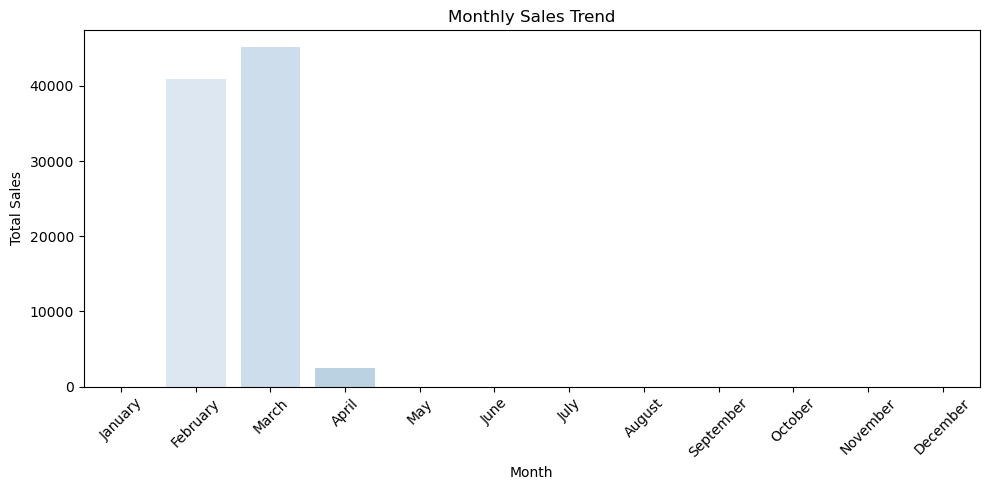

In [223]:
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

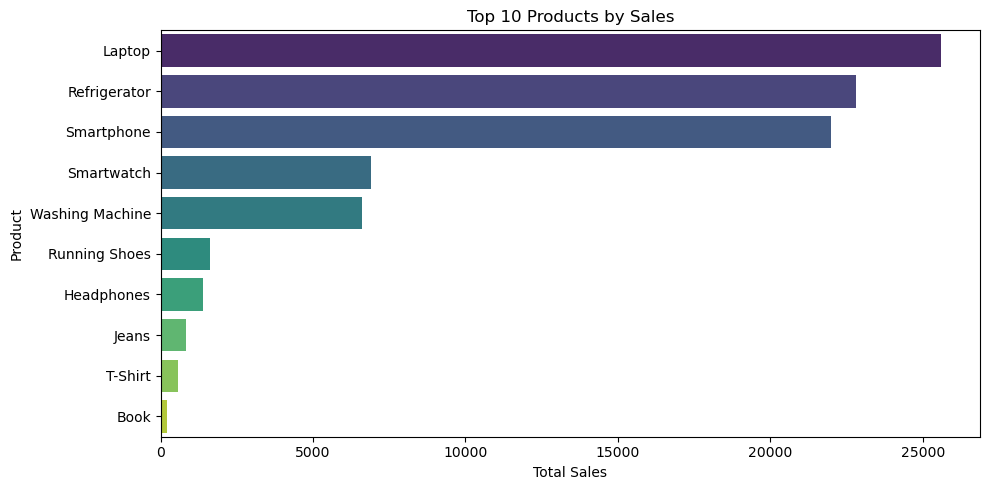

In [224]:
#Top 10 Products by Sales
top_products = df_completed.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

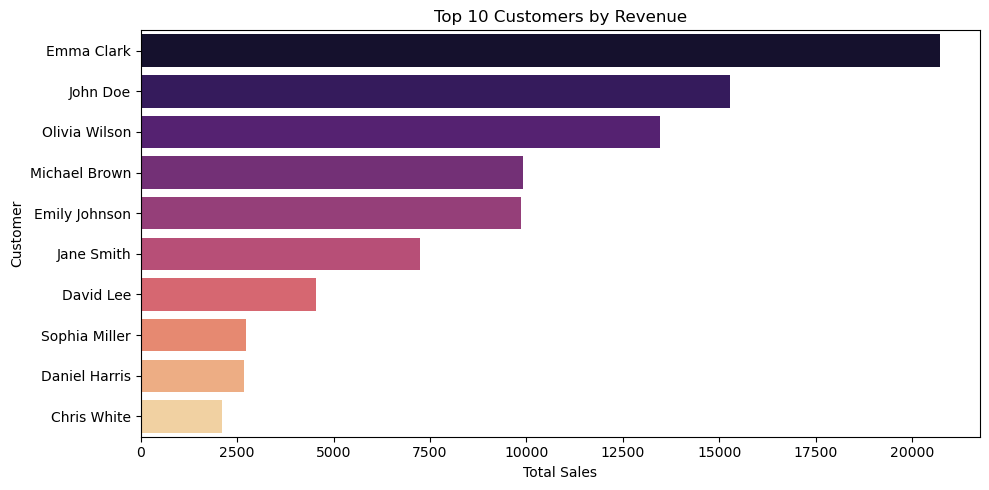

In [225]:
#Top 10 Customers by Revenue
top_customers = df_completed.groupby('Customer Name')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

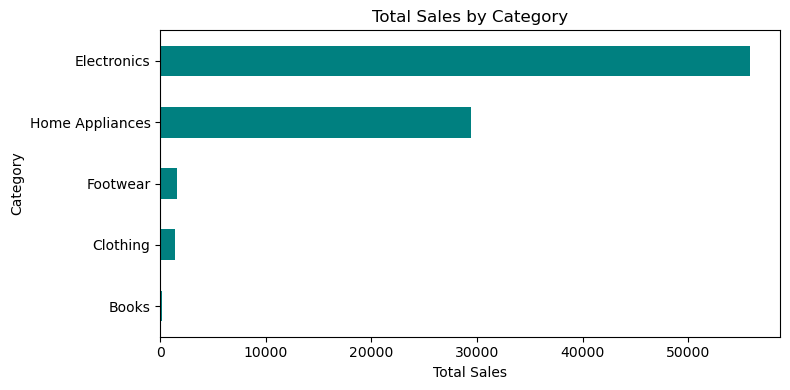

In [226]:
#Category-wise Revenue
category_sales = df_completed.groupby('Category')['Total Sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,4))
category_sales.plot(kind='barh', color='teal')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [227]:
df_completed.to_csv("amazon_completed_orders_final.csv", index=False)

In [228]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%y")
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

In [229]:
df.to_csv("amazon_all_orders.csv", index=False)